In [1]:
# Because of memory exhaution I only used simple models without any gridsearch or random search

In [2]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Dataframe
path_df = "Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [4]:
print(features_train.shape)
print(features_test.shape)

(5, 300)
(1, 300)


# Using KNN classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knnc_0 =KNeighborsClassifier(n_neighbors=3)

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}


In [6]:
knnc_0.fit(features_train, labels_train)


KNeighborsClassifier(n_neighbors=3)

In [7]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, knnc_0.predict(features_train)))

The training accuracy is: 
0.8


In [8]:

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_0.predict(features_test)))

The test accuracy is: 
0.0


In [9]:

# Classification report
print("Classification report")
print(classification_report(labels_train,knnc_0.predict(features_train)))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



C:\Users\tt0342\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


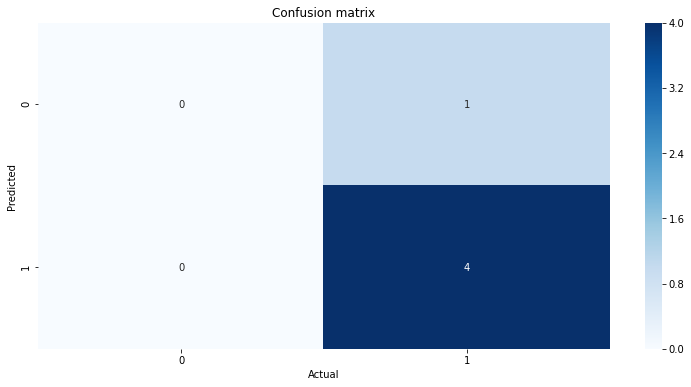

In [10]:
aux_df = df[['labels']].drop_duplicates().sort_values('labels')
conf_matrix = confusion_matrix(labels_train,knnc_0.predict(features_train))
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['labels'].values, 
            yticklabels=aux_df['labels'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [11]:

d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, knnc_0.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_0.predict(features_test))
}

df_models_knn = pd.DataFrame(d, index=[0])

df_models_knn

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.8,0.0


In [12]:
with open('Models/knn.pickle', 'wb') as output:
    pickle.dump(knnc_0, output)
    
with open('Models/knn.pickle', 'wb') as output:
    pickle.dump(df_models_knn, output)

# SVM Classfier

The training accuracy is: 
1.0
The test accuracy is: 
0.0
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



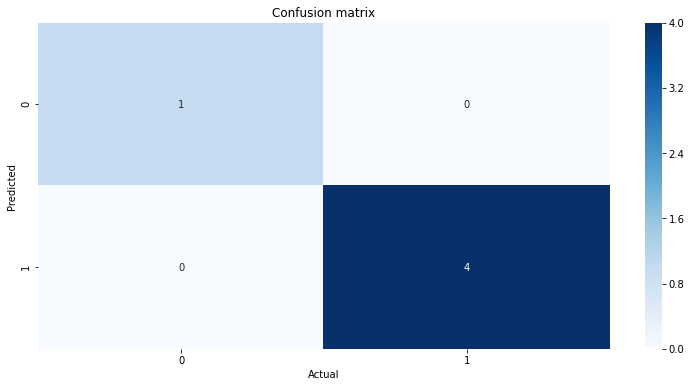

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,1.0,0.0


In [16]:
svm_clf = svm.SVC()
svm_clf.fit(features_train, labels_train)
print("The training accuracy is: ")
print(accuracy_score(labels_train, svm_clf.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svm_clf.predict(features_test)))

# Classification report
print("Classification report")
print(classification_report(labels_train, svm_clf.predict(features_train)))
aux_df = df[['labels']].drop_duplicates().sort_values('labels')
conf_matrix = confusion_matrix(labels_train,svm_clf.predict(features_train))
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['labels'].values, 
            yticklabels=aux_df['labels'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, svm_clf.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svm_clf.predict(features_test))
}

df_models_svc = pd.DataFrame(d, index=[0])

df_models_svc